In [104]:
## import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics, svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score


In [43]:
## load the data
df = pd.read_csv("emails.csv")
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [94]:
df['Prediction'].value_counts()

0    3672
1    1500
Name: Prediction, dtype: int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [45]:
df = df.drop(columns=['Email No.'])

In [46]:
## split the data into independent and dependent variable
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values



In [47]:
## split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 32)


In [48]:
## TRAIN THE LOGISTIC REGRESSION
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)


C:\Users\AbayomiBello\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
##  make the prediction
pred_LR = model_LR.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': pred_LR})

,Actual,Predicted
0,0,1
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
1030,1,1
1031,0,0
1032,1,1
1033,0,0


In [50]:
## evaluate the model accuracy
accuracy_LR = accuracy_score(y_test, pred_LR)

## CONFUSION MATRIX
conf_mat = confusion_matrix(y_test, pred_LR)

print(accuracy_LR)
print(conf_mat)


0.9632850241545894
[[698  18]
 [ 20 299]]


In [51]:
## naives bayes
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)


GaussianNB()

In [52]:
## predict the test set
y_pred_NB = model_NB.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_NB})


,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
1030,1,1
1031,0,0
1032,1,1
1033,0,0


In [53]:
## Evaluate the naive bayes model
accuracy_NB = accuracy_score(y_test, y_pred_NB)
conf_mat_NB = confusion_matrix(y_test, y_pred_NB)


print(accuracy_NB)
print(conf_mat_NB)

0.9458937198067633
[[676  40]
 [ 16 303]]


In [62]:
## K-Nearest Neighbors
Knn_model = KNeighborsClassifier(n_neighbors=5)
##train my model
Knn_model.fit(X_train, y_train)



KNeighborsClassifier()

In [63]:
## Make prediction
y_pred_knn = Knn_model.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_knn})

,Actual,Predicted
0,0,1
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
1030,1,1
1031,0,0
1032,1,1
1033,0,0


In [64]:
## Evaluate the naive bayes model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_mat_knn = confusion_matrix(y_test, y_pred_knn)


print(accuracy_knn)
print(conf_mat_knn)

0.8734299516908213
[[631  85]
 [ 46 273]]


In [66]:
## Decision tree classifier
Decision_tree_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=3, min_samples_leaf=5) 
Decision_tree_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5) 
Decision_tree_max_depth = DecisionTreeClassifier(max_depth=5)



In [67]:
## trainiong my models
Decision_tree_gini.fit(X_train,y_train)
Decision_tree_entropy.fit(X_train,y_train)
Decision_tree_max_depth.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=5)

In [68]:
## make prediction
y_pred_gini = Decision_tree_gini.predict(X_test)
y_pred_entropy = Decision_tree_entropy.predict(X_test)
y_pred_depth3 = Decision_tree_max_depth.predict(X_test)

In [69]:
## make a dataframe prediction
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_gini})

,Actual,Predicted
0,0,1
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
1030,1,1
1031,0,0
1032,1,1
1033,0,0


In [70]:
## make a dataframe prediction
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_entropy})

,Actual,Predicted
0,0,1
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
1030,1,1
1031,0,1
1032,1,1
1033,0,0


In [71]:
## make a dataframe prediction
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_depth3})

,Actual,Predicted
0,0,1
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
1030,1,1
1031,0,0
1032,1,1
1033,0,0


In [72]:
## model evaluation
## Evaluate the gini
accuracy_gini = accuracy_score(y_test, y_pred_gini)
conf_mat_gini = confusion_matrix(y_test, y_pred_gini)




print(accuracy_gini)
print(conf_mat_gini)

0.8347826086956521
[[690  26]
 [145 174]]


In [73]:
## Evaluate the entropy
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
conf_mat_entropy = confusion_matrix(y_test, y_pred_entropy)


print(accuracy_entropy)
print(conf_mat_entropy)

0.7855072463768116
[[497 219]
 [  3 316]]


In [74]:
## Evaluate the max_depth
accuracy_max_depth = accuracy_score(y_test, y_pred_depth3)
conf_mat_max_depth = confusion_matrix(y_test, y_pred_depth3)


print(accuracy_max_depth)
print(conf_mat_max_depth)

0.8444444444444444
[[703  13]
 [148 171]]


In [76]:
## SVM
#Create a SVM Classifier
clfLinear = svm.SVC(kernel='linear')
clfsigmoid = svm.SVC(kernel='sigmoid') 
clfrbf = svm.SVC(kernel='rbf') 

In [77]:

#Train the model using the training sets
clfLinear.fit(X_train, y_train)
clfsigmoid.fit(X_train, y_train)
clfrbf.fit(X_train, y_train)

SVC()

In [78]:
#Predict the response for test dataset
y_pred_linear = clfLinear.predict(X_test)
y_pred_sigmoid = clfsigmoid.predict(X_test)
y_pred_rbf = clfrbf.predict(X_test)


In [85]:
## make a dataframe prediction for linear kernel
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_linear})

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
1030,1,1
1031,0,0
1032,1,1
1033,0,0


In [86]:
## make a dataframe prediction for linear kernel
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_sigmoid})

,Actual,Predicted
0,0,1
1,0,0
2,0,0
3,0,1
4,1,1
...,...,...
1030,1,0
1031,0,1
1032,1,0
1033,0,1


In [87]:
## make a dataframe prediction for linear kernel
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rbf})

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
1030,1,0
1031,0,0
1032,1,0
1033,0,0


In [83]:
#Calculate the accuracy of our model
print("Linear Kernel Accuracy:",metrics.accuracy_score(y_test, y_pred_linear))
print("Sigmoid kernel Accuracy:",metrics.accuracy_score(y_test, y_pred_sigmoid))
print("rbf kernelAccuracy:",metrics.accuracy_score(y_test, y_pred_rbf))

Linear Kernel Accuracy: 0.9449275362318841
Sigmoid kernel Accuracy: 0.6231884057971014
rbf kernelAccuracy: 0.7961352657004831


In [84]:
## confussion matrix for the kernels
conf_mat_linear = confusion_matrix(y_test, y_pred_linear)
conf_mat_sigmoid = confusion_matrix(y_test, y_pred_sigmoid)
conf_mat_rbf = confusion_matrix(y_test, y_pred_rbf)

print(conf_mat_linear)
print(conf_mat_sigmoid)
print(conf_mat_rbf)

[[693  23]
 [ 34 285]]
[[541 175]
 [215 104]]
[[696  20]
 [191 128]]


<AxesSubplot: >

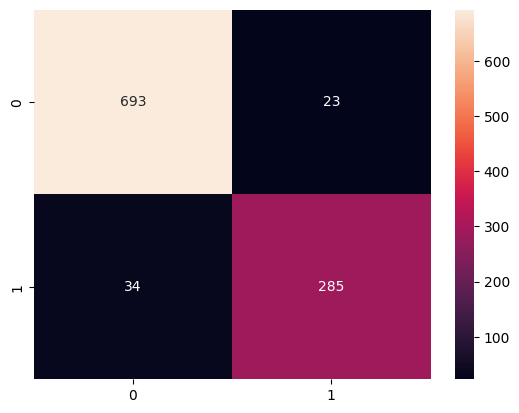

In [107]:
sns.heatmap(conf_mat_linear, annot=True, fmt='.0f')

In [103]:
print(classification_report(y_test, y_pred_linear))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       716
           1       0.93      0.89      0.91       319

    accuracy                           0.94      1035
   macro avg       0.94      0.93      0.93      1035
weighted avg       0.94      0.94      0.94      1035



In [106]:
auc = roc_auc_score(y_test, y_pred_linear)
print('AUC: %f' %auc)

AUC: 0.930647


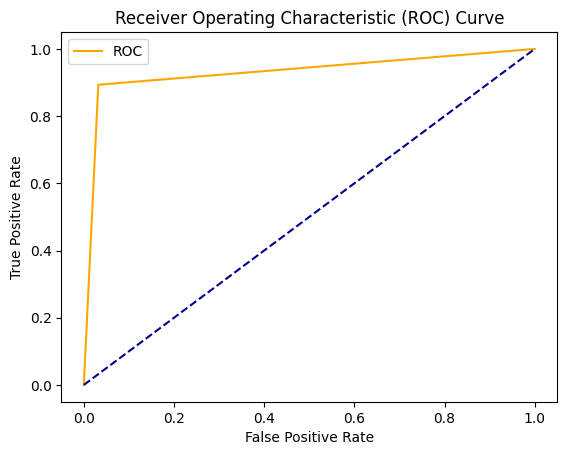

In [105]:
fpr, tpr = roc_curve(y_test, y_pred_linear)[0:2]

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()